# Differensiallikninger og kontinuerlige modeller

```{admonition} Læringsutbytte
Etter å ha arbeidet med dette temaet, skal du kunne:
1. Forklare hva som menes med differensiallikninger, og hvordan slike likninger kan brukes til å modellere ulike systemer.
2. Forklare og implementere Eulers metode (Forward Euler).
3. Løse ordinære differensiallikninger med egne Python-funksjoner og funksjoner fra Scipy-biblioteket.
```

## Differensiallikninger

Vi har tidligere sett på modeller som beskriver endringer ved bestemte tidssteg, for eksempel den enkleste modellen for utviklingen i antall smittede ved et influensautbrudd:

$$I_{n+1}=I_n+aI_n$$

Vi kan beskrive modellen ovenfor med ord slik: Antall smittede ved neste tidspunkt er lik antall smittede ved forrige tidspunkt pluss en endring i antall smittede. Endringen er her gitt ved en vekstfaktor ganger antall smittede ved forrige tidspunkt. Det betyr at endringen er proporsjonal med antall smittede. Dette er et eksempel på en _differenslikning_, der vi finner en tallfølge, som for eksempel beskriver antall smittede i en populasjon eller antall gauper i et økosystem. Differenslikninger kan brukes der vi kan nøye oss med å beskrive systemet vårt på _diskrete_, altså bestemte, tider. Men hva hvis vi ønsker å beskrive systemet på ethvert tidspunkt, altså den _momentane endringen_? Da må vi bruke den deriverte. La oss første skrive differenslikningen på en annen form:

$$I_{n+1} - I_n = aI_n$$

$$\Delta I = aI_n$$

Nå har vi et uttrykk for endringen i systemet. Delta ($\Delta$) betyr her endring eller forskjell. Dersom denne endringen skjer mellom to tidspunkter som er så nær hverandre som mulig ($\Delta t$ nærmer seg null), får vi den momentane endringen. Dette skriver vi slik:

$$I'(t) = aI(t)$$

Dette er ikke lenger en differenslikning, for her beskriver vi systemet med en kontinuerlig funksjon, og ikke funksjonsverdier på bestemte tidspunkter. Vi kaller slike likninger for _differensiallikninger_. En differensiallikning (også kalt _difflikning_) er en likning som inneholder den deriverte av en funksjon. Det vil si at differensiallikninger beskriver den momentane endringen i et system, altså endringen på ethvert tidspunkt. Når vi løser en differensiallikning, får vi en funksjon, eller funksjonsverdiene til en funksjon.

Differensiallikninger er svært anvendelige. De brukes til å beskrive endring i alt fra molekyler i en kjemisk reaksjon til bakterier i en petriskål eller bevegelsen til satelitter og planeter. De brukes også til å modellere overføring av informasjon i hjernen, smitteutvikling, økonomisk vekst, inntekt og investeringer, klima, miljø og vær. De fleste difflikninger er ikke løsbare for hånd. Derfor er det svært nyttig å kunne løse dem numerisk.

```{admonition} Differensiallikninger
En differensiallikning er en likning som inneholder den deriverte av en funksjon. I de fleste praktiske situasjoner beskriver slike likninger sammenhengen mellom endringen, $f'(t)$, og tilstanden, $f(t)$, til et system ved tida $t$.
```
Det vil altså si at en difflikning er en sammenheng mellom den deriverte til en funksjon, altså endringen i funksjonen, og funksjonen selv. Når vi løser en difflikning, får vi ikke et uttrykk for $x$, som når vi løser likninger – vi får et uttrykk for $f(x)$. Siden vi som oftest løser difflikninger på datamaskinen, får vi heller ikke et _uttrykk_ for $f(x)$, men vi får funksjons_verdier_.

Siden både endringen og tilstanden i et system er avhengig av hvordan systemet er til å begynne med, trenger vi alltid _initialbetingelser_ (startbetingelser) for å løse difflikninger. For eksempel trenger vi antall smittede ved t = 0 for å kunne regne ut antall smittede ved neste tidssteg. Vi må derfor alltid oppgi initialbetingelser når vi skal simulere et system.

### Eksempler på differensiallikninger

Dersom du møter på differensiallikninger i matematikk, er de ofte satt opp som enkle uttrykk, for eksempel slik:

1. $y' = 1$
2. $y' = y$
3. $y' - 2x = -1$

Dersom likningene betyr noe praktisk, pleier vi å skrive dem litt annerledes. Her er eksempler på differensiallikninger som kan brukes til å beskrive ulike systemer:

1. Bakterievekst: $B'(t) = kB(t)$
2. CO$_2$-utslipp: $U'(t) = aU(t)\left(1 - \frac{U(t)}{b}\right)$
3. Fallende ball: $v'(t) = -g - \frac{kv(t)^2}{m}$

```{admonition} Underveisoppgave
:class: tip
Studer differensiallikningene ovenfor og forklar med ord hva de beskriver (både overordnet og hvert ledd for seg).
```

Legg merke til at modellene ikke kan bevises eller utledes. Det er matematiske modeller som vi kan ha en hypotese om at stemmer godt med virkeligheten. Hvis vi for eksempel tror at veksten til bakteriene vil flate ut, justerer vi dette ved å legge til et ledd som gir logistisk vekst. Modellene må så etterprøves ved for eksempel å sammenlikne med reelle data. Modellering er derfor en prosess der vi kontinuerlig sammenlikner modell med virkelighet for å forbedre modellen.

### Newtons 2. lov

Et annet viktig eksempel på en differensiallikning er Newtons 2. lov.  Newtons 2. lov er grunnlaget for simuleringer av alt fra satellitt- og planetbaner til molekyler, som vi snart skal se eksempler på. Loven sier at summen ($\Sigma$) av krefter som virker på et legeme er lik produktet av massen og akselerasjonen til legemet:

$$\sum F = ma$$

$$a = \frac{\sum F}{m}$$

Dersom vi har en modell som beskriver kreftene som virker på et legeme, kan vi derfor regne ut akselerasjonen. Og siden $a(t) = v'(t) = s''(t)$, kan vi formulere Newtons 2. lov som en differensiallikning. Da kan vi løse denne likningen og finne farten og posisjonen til et legeme på en hvilken som helst tid, gitt en startposisjon og en startfart (initialverdier).

$$v'(t) = \frac{\sum F}{m}$$

Vi kan til og med formulere dette som en difflikning som inneholder den andrederiverte. Dette kaller vi en _andreordens_ difflikning:

$$s''(t) = \frac{\sum F}{m}$$

La oss modellere et enkelt system, for eksempel en fallende kule. I modellen vår ønsker vi å ta hensyn til både gravitasjon og luftmotstand. Da er $\sum F = - G + L$, dersom vi velger positiv retning oppover. Vi skriver også akselerasjonen som en funksjon, siden den varierer med tida. Da får vi at:

$\sum F = ma(t)$

$a(t) = \frac{\sum F}{m}$

$a(t) = - \frac{G}{m} + \frac{L}{m}$

Deretter må vi sette inn modeller for gravitasjonskraften og luftmotstanden. Gravitasjonen på jorda kan enkelt beskrives med modellen $G = mg$, der $m$ er massen i kg og $g \approx 9.8$ m/s$^2$, som er tyngdeakselerasjonen. En enkel modell for luftmotstand er $L = -kv$, der _k_ er en konstant som varierer med legemets form og massetetthet, og $v$ er farten til legemet. Konstanten $k$ må bestemmes eksperimentelt.

$a(t) = \frac{mg}{m} - \frac{kv(t)}{m}$

$v'(t) = g - \frac{kv(t)}{m}$

Her ser vi at den siste likningen inneholder den deriverte av farten (altså akselerasjonen). Altså er dette en differensiallikning. 

## Eulers metode
Vi har altså en startverdi $f(x_0)$ og ønsker å finne $f(x_0 + dx)$, altså neste funksjonsverdi. I tillegg har vi et uttrykk for den deriverte av funksjonen, nemlig differensiallikningen. Du kjenner faktisk allerede til et uttrykk som inneholder en funksjon og dens deriverte, nemlig definisjonen av den deriverte. La oss bruke den til å utlede en metode for å finne $f(x + dx)$. Vi bruker den numeriske definisjonen der vi tilnærmer grenseverdiene med en _dx_ ($\Delta x$) som er så liten som mulig:

$$f'(x) \approx \frac{f(x+dx) - f(x)}{dx}$$

Til å begynne med kjenner vi $f(x)$, altså $f(x_0)$. Dette er initialbetingelsen, for eksempel startkonsentrasjonen $c(t_0)$ i eksempelet ovenfor. Vi kjenner også et uttrykk for den deriverte, nemlig differensiallikningen. I tillegg bestemmer vi selv tidssteget _dx_, men husk at det verken bør være for lite eller for stort. Den eneste ukjente i den numeriske tilnærmingen til den deriverte er altså $f(x+dx)$. Det er jo nettopp $f(x+dx)$ vi prøver å finne, fordi det beskriver tilstanden til systemet ved neste tidssteg. Med litt enkel algebra får vi omformet uttrykket slik at det blir et uttrykk for $f(x+dx)$. Vi ganger først med $dx$ på begge sider:

$$f'(x)\cdot dx \approx f(x+dx) - f(x)$$

Deretter får vi $f(x+dx)$ aleine på høyre side og ender opp med følgende likning:

$$f(x+dx) \approx f(x) + f'(x)\cdot dx$$

Dette er _Eulers metode_, eller nærmere bestemt _Forward Euler_. Metoden kalles dette fordi den tar utgangspunkt i framoverdifferansen til den deriverte. Den  brukes til å løse differensiallikninger, det vil si å _integrere_ den deriverte slik at vi finner funksjonsverdiene. Siden vi ofte har å gjøre med funksjoner som varierer med tid, kaller vi gjerne _dx_ for _dt_.

Eulers metode er en iterativ algoritme. Vi starter derfor med $f(x_0)$ og finner de påfølgende funksjonsverdiene slik:

$$f(x_1) \approx f(x_0) + f'(x_0)\cdot \Delta x$$
$$f(x_2) \approx f(x_1) + f'(x_1)\cdot \Delta x$$
$$f(x_3) \approx f(x_2) + f'(x_2)\cdot \Delta x$$
$$...$$

```{admonition} Eulers metode (Forward Euler)
Vi kan finne funksjonsverdiene $f(t_{k+1})$ ved å bruke funksjonsverdien $f(t_k)$ og den deriverte av funksjonen ved tida $t_k$, $f'(t_k)$ sammen med en steglengde $dt$ som representerer en liten $\Delta t$.

$$f(t_{k+1}) = f(t_k) + f'(t_k)\cdot dt$$
```



### Implementering
Vi starter med et enkelt eksempel der vi løser difflikningen $f'(x) = x$ (som er det samme som $y' = x$). Vi gjør det først med en while-løkke der vi appender til lister for å spare på og til slutt plotte verdiene. Stort sett er det sammme framgangsmåte hver gang vi løser en difflikning:

1. Definer initialbetingelser (for eksempel $y_0$).
2. Definer hvilke verdier vi skal evaluere funksjonen i, altså et intervall $[x_0, x_{slutt}]$. Husk at vi bare kan derivere og integrere numerisk i bestemte _punkter_. Vi får altså ikke funksjoner når vi integrerer en differensiallikning – vi får funksjonsverdier.
3. Definer en steglengde. Denne bør være "ganske" liten, som da vi så på numerisk derivasjon. Som regel er $dx = 1\cdot 10^{-8}$ en god verdi, men du kan gjerne kjøre med for eksempel $dx = 1\cdot 10^{-3}$, slik at det ikke skal ta så lang tid å kjøre programmet.
4. Lag lister eller arrayer og legg initialbetingelser og startverdier inn i disse. Disse trenger vi for å kunne plotte resultatene til slutt. Dersom du bare er interessert i slutt-tilstanden, trenger du ikke dette trinnet.
5. Lag ei løkke som går igjennom hele det definerte intervallet:
    - Regn ut neste verdi av endringen $f'(x)$, gitt av differensiallikninga vår.
    - Løs difflikninga med Eulers metode (eller en annen metode, når du lærer om det).
    - Oppdater den uavhengige variabelen (_x_, _t_ eller liknende) med tidssteget.
6. Skriv ut eller visualiser resultatene. 

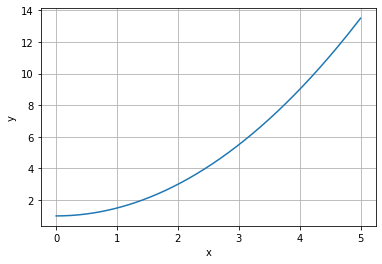

In [2]:
import matplotlib.pyplot as plt

y0 = 1                         # intitialbetingelse for y
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-5                      # steglengde

x_liste = [x0]     # Legger inn første x-verdi i en liste for å spare på verdiene
y_liste = [y0]     # Legger inn initalbetingelsen for y i en liste for å spare på verdiene

# Disse variablene skal oppdateres i løkka, mens x0 og y0 holdes konstante
x = x0             
y = y0

while x < x_slutt:
    yder = x        # Difflikningen vi skal løse
    y = y + yder*dx # Eulers metode for å finne neste y-verdi
    x = x + dx      # Oppdaterer x-verdien med steglengden
    x_liste.append(x)
    y_liste.append(y)

plt.plot(x_liste,y_liste)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

For å rydde opp litt i programmet vårt, kunne vi også definert difflikninga som en funksjon. Dette gjør det litt enklere å finne igjen og endre likningen.

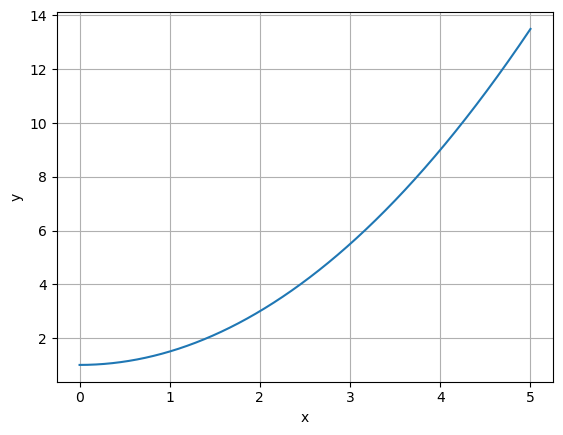

In [1]:
import matplotlib.pyplot as plt
import numpy as np

y0 = 1                         # intitialbetingelse for y
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-5                      # steglengde

x_liste = [x0]     # Legger inn første x-verdi i en liste for å spare på verdiene
y_liste = [y0]     # Legger inn initalbetingelsen for y i en liste for å spare på verdiene

# Disse variablene skal oppdateres i løkka, mens x0 og y0 holdes konstante
x = x0             
y = y0

# Definerer difflikningen som en funksjon
def fder(x):
    return x

while x < x_slutt:
    yder = fder(x)   # Difflikningen vi skal løse
    y = y + yder*dx # Eulers metode for å finne neste y-verdi
    x = x + dx      # Oppdaterer x-verdien med steglengden
    x_liste.append(x)
    y_liste.append(y)

plt.plot(x_liste,y_liste)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

```{admonition} Underveisoppgave
:class: tip
Modifiser programmet ovenfor slik at du løser difflikningen $f'(x) = \frac{1}{y+1} - lg(x+2)$. Bruk samme initialbetingelse og løsningsintervall.
```

````{admonition} Løsningsforslag
:class: tip, dropdown

Her er det bare å endre funksjonen slik at den representerer den nye difflikninga. Husk å importere tierlogaritmen.

```{code-block} Python
import matplotlib.pyplot as plt
import numpy as np

y0 = 1                         # intitialbetingelse for y
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-5                      # steglengde

x_liste = [x0]     # Legger inn første x-verdi i en liste for å spare på verdiene
y_liste = [y0]     # Legger inn initalbetingelsen for y i en liste for å spare på verdiene

# Disse variablene skal oppdateres i løkka, mens x0 og y0 holdes konstante
x = x0             
y = y0

# Definerer difflikningen som en funksjon
def fder(x):
    return 1/(y+1) - np.log10(x+2)

while x < x_slutt:
    yder = fder(x)   # Difflikningen vi skal løse
    y = y + yder*dx # Eulers metode for å finne neste y-verdi
    x = x + dx      # Oppdaterer x-verdien med steglengden
    x_liste.append(x)
    y_liste.append(y)

plt.plot(x_liste,y_liste)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
```
````

Vi kan også bruke arrayer istedenfor lister. Dette gir en raskere kode, og kan være en fordel i mange tilfeller. Da appender vi ikke til lister, men bruker indeksering. Vi bruker også gjerne en for-løkke, og da må vi vite hvor mange ganger løkka skal gå. Dette kan vi regne ut ved å ta differansen mellom $x_0$ og $x_{slutt}$, som vi dividerer på steglengden $dx$. Da får vi antall intervaller mellom $x_0$ og $x_{slutt}$ med avstand $dx$. For å finne antall punkter, må vi derfor ta antall intervaller og legge til 1: 

$N_{punkter} = \frac{x_{slutt} - x_0}{dx} + 1$

```{admonition} Underveisoppgave
:class: tip

Forklar hvorfor antallet punkter _N_ kan regnes ut som ovenfor.
```

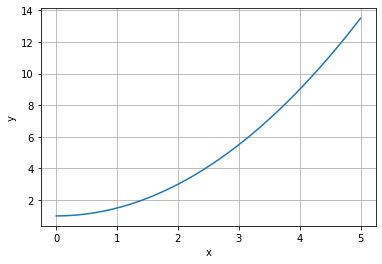

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Plotteverdier
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-5                      # steglengde
N = int((x_slutt - x0)/dx) + 1 # antall punkter

# Initialbetingelser
y0 = 1                  # intitialbetingelse for y

# Differensiallikningen
def yder(y,x):
    return x

# Lager arrayer for å spare på verdiene
x = np.zeros(N)
y = np.zeros(N)
y[0] = y0     # Legger inn initalbetingelsen for y
x[0] = x0

# Eulers metode
for i in range(N-1):
    y[i+1] = y[i] + yder(y[i],x[i])*dx
    x[i+1] = x[i] + dx

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

```{admonition} Underveisoppgave
:class: tip

Forklar programmet ovenfor linje for linje. Modifiser også programmet slik at det løser difflikninga $f'(x) = 1$.
```

### Ulike initialbetingelser
Dersom vi endrer initialbetingelsene, får vi naturlig nok andre løsninger. Her har vi et program som regner ut og plotter ut 

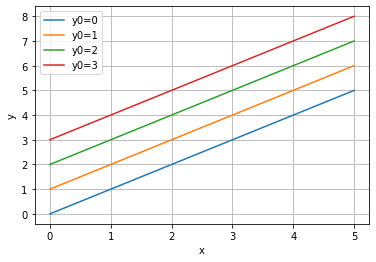

In [19]:
# Plotteverdier
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-3                      # steglengde
N = int((x_slutt - x0)/dx) + 1 # antall punkter

# Initialbetingelser
y0 = 1                  # intitialbetingelse for y

# Differensiallikningen y' = 1
def yder(y,x):
    return 1 

# Lager arrayer for å spare på verdiene
x = np.zeros(N)
y = np.zeros(N)
x[0] = x0

y_liste = [0, 1, 2, 3]
for y0 in y_liste:
    y[0] = y0 
    for i in range(N-1):
        y[i+1] = y[i] + yder(y[i],x[i])*dx
        x[i+1] = x[i] + dx
    plt.plot(x,y,label=f"y0={y0}")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Det er enkelt å se at funksjonene vi får ovenfor er $y = x + C$, der $C$ avhenger av initialbetingelsene. Vi får derimot ikke selve funksjonsuttrykket som output, men vi får, som nevnt før, _funksjonsverdiene_. Vi kan også løse likningen $y' = y + x$ på samme måte. Den analytiske løsningen for denne likningen er $y = Ce^x - x - 1$. Resultatene blir da slik for de samme initialbetingelsene som ovenfor:

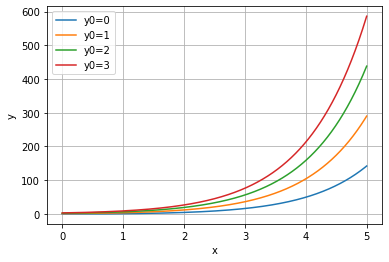

In [13]:
def yder(y,x):
    return y + x

y_liste = [0, 1, 2, 3]
for y0 in y_liste:
    y[0] = y0 
    for i in range(N-1):
        y[i+1] = y[i] + yder(y[i],x[i])*dx
        x[i+1] = x[i] + dx
    plt.plot(x,y,label=f"y0={y0}")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

```{admonition} Underveisoppgave
:class: tip
Løs differensiallikninga $y' + y^3 = \sin(x)$ med Eulers metode fra $x = 0$ til $x = 10$. Bruk initialbetingelsen $y(0) = 0$. Vær nøye med hvordan du definerer funksjonen.
```


## Kontinuerlige modeller

Modeller som er basert på differensiallikninger, er kontinuerlige. Det betyr at de har funksjonsverdier for alle verdier av _x_ (eller tilsvarende variabler). Nå skal det sies at når vi simulerer med utgangspunkt i kontinuerlige matematiske modeller på en datamaskin, blir resultatene ikke helt kontinuerlig. Det er fordi datamaskinen ikke kan operere med uendelig mange eller uendelig små (eller store) verdier. Vi sier at vi _diskretiserer_ problemet når vi benytter en numerisk algoritme for å løse det. Men dersom stegene er tilstrekkelig små, er det en god _tilnærming_ til en kontinuerlig løsning.

Vi har allerede sett på diskrete modeller for blant annet CO$_2$-utslipp. Da tok vi utgangspunkt i følgende diskrete modell:

$$u_{n+1} = u_n + au_n$$

som er det samme som:

$$u_{n+1} - u_n = au_n$$

Vi ser at vi på venstresiden har forskjellen i utslipp fra en tid til en annen. Det kan vi skrive som $\Delta u$, som jo er et uttrykk for (gjennomsnittlig) endring. Da får vi:

$$\Delta u = au_n$$

Dersom vi ønsker den _momentane_ endringen istedenfor den gjennomsnittlige, kan vi uttrykke dette ved den deriverte:

$$u'(t) = au(t)$$

Dermed har vi en kontinuerlig modell som beskriver den momentane endringen i et system! Vi kan da bruke denne modellen til å finne tilstanden til systemet ved ethvert lite tidssteg _dt_. Da kan vi bruke Eulers metode, som ovenfor. Her er et eksempel på hvordan vi kan løse modellen ovenfor:

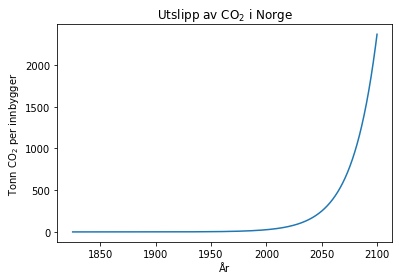

In [6]:
import matplotlib.pyplot as plt 

tid_slutt = 2100  # År etter 1825
tid = 1825        # Startår
a = 0.045         # Utslippsrate
u = 0.01          # Utslipp i 1825 (tonn per innbygger)
dt = 1E-5

utslipp = [u]
årstall = [tid]

while tid <= tid_slutt:
    uder = a*u      # Differensiallikningen
    u = u + uder*dt # Eulers metode
    tid = tid + dt  # Går fram ett tidssteg
    utslipp.append(u)
    årstall.append(tid)

plt.plot(årstall, utslipp)
plt.title("Utslipp av CO$_2$ i Norge")
plt.xlabel("År")
plt.ylabel("Tonn CO$_2$ per innbygger")
plt.show()

Hvis vi sammenlikner med den diskrete modellen for det samme systemet, kan vi se at de to modellene ikke gir det samme resultatet. Dette er fordi utslippsraten _a_ ikke har samme enhet. I det diskrete systemet representerte _a_ vekstraten _per uke_, mens i den kontinuerlige modellen gir _a_ den momentane vekstraten. De to parameterne må derfor bestemmes uavhengig av hverandre.

````{admonition} Underveisoppgave
:class: tip
Følgende modell kan beskrive størrelsen til en populasjon med bæreevnen _b_, vekstrate _a_ og populasjonsstørrelse _N_:

$$N'(t) = aN(t)\left(1-\frac{N(t)}{b}\right)$$

Tida _t_ er gitt i timer.

1. Lag et program som simulerer utviklingen i en bakteriekoloni med N(t$_0$) = 100, _a_ = 0,005 og en bæreevne på 120 000 bakterier. 
2. Hvilke forutsetninger og begrensninger ligger til grunn for modellen? 
3. Når vil populasjonen nå bæreevnen?
4. Lag programmet med arrayer istedenfor lister. Husk at _append_ ikke fungerer med arrayer, og at vi må forhåndsdefinere størrelsen til disse arrayene på forhånd. Størrelsen på disse bør være gitt ved (forklar hvorfor!):

```{code-block}
N = int((tid_slutt-tid_start)/dt) + 1 # Antall punkter
```
````

````{admonition} Løsningsforslag (deloppgave 4)
:class: tip, dropdown
```{code-block} Python
import matplotlib.pyplot as plt 
import numpy as np

a = 0.045               # Utslippsrate
u0 = 0.01               # Utslipp i 1825 (tonn per innbygger)

tid_slutt = 2100        # År etter 1825
tid_start = 1825        # Startår
dt = 1E-3               # tidssteg
N = int((tid_slutt-tid_start)/dt) + 1 # Antall punkter

u = np.zeros(N)
t = np.zeros(N)

u[0] = u0
t[0] = tid_start

for i in range(N-1):
    uder = a*u[i]               # Differensiallikningen
    u[i+1] = u[i] + uder*dt     # Eulers metode
    t[i+1] = t[i] + dt          # Går fram ett tidssteg

plt.plot(t, u)
plt.title("Utslipp av CO$_2$ i Norge")
plt.xlabel("År")
plt.ylabel("Tonn CO$_2$ per innbygger")
plt.show()
```
````

## Newtons 2. lov

Vi så at Newtons 2. lov gir oss differensiallikninger når vi omformulerer akselerasjonen som den deriverte av farten.

$$a(t) = v'(t) = s''(t)$$

Vi kan altså få både en førsteordens og en andreordens difflikning ut av Newtons 2. lov. Det betyr også at vi kan finne akselerasjon og fart ut fra strekning ved å derivere, og motsatt finne fart og posisjon fra akselerasjon ved å integrere (løse difflikningen). Vi kan med andre ord skrive Newtons 2. lov slik:

$$\sum F = ma(t) = mv'(t) = ms''(t)$$

La oss løse Newtons 2. lov for det enkle systemet vi så på tidligere: Når vi slipper ei kule fra en viss høyde, kan vi regne med at to krefter virker på kula, nemlig tyngdekraften og luftmotstand. For en lett ball som faller, kan vi si at summen av krefter er summen av gravitasjonskraften og luftmotstanden i $y$-retning på en graf. Vi definerer positiv retning oppover $y$-aksen.

$$\sum F = - G + L = ma(t) = mv'(t) = ms''(t)$$

Vi ser at vi nå har den deriverte av hastigheten, som er akselerasjonen. For å kunne løse denne likningen, må vi finne ut hva summen av kreftene er. Du husker kanskje at $G = mg$, og at en mulig modell for luftmotstand er $L = -kv$, der $k$ er en konstant som blant annet er avhengig av legemets form. Da kan vi skrive uttrykket slik:

$$ma(t) = - mg + (- kv(t))$$

$$a(t) = \frac{- mg - kv(t)}{m} = - g - \frac{kv(t)}{m}$$

Dette er en førsteordens difflikning der vi har en funksjon $v(t)$, og dens deriverte $a(t)$ (det vil si $v'(t)$). La oss løse denne numerisk:

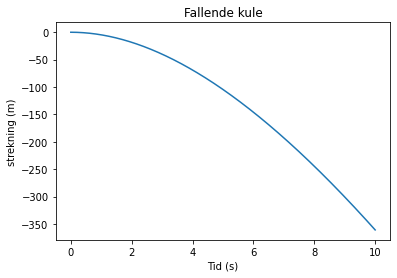

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Konstanter
k = 0.1   # Luftmotstand
g = 9.81  # Tyngdeakselerasjon i m/s^2
m = 1     # Masse i kg
v0 = 0    # Starthastighet i m/s
s0 = 0    # Startposisjon i m

# Tidsvariabler
dt = 1E-5 # Tidsintervall i s
tid_start = 0
tid_slutt = 10
N = int((tid_slutt-tid_start)/dt) + 1 # Antall punkter

# Arrayer
t = np.zeros(N)
a = np.zeros(N)
v = np.zeros(N)
s = np.zeros(N)

# Startverdier
t[0] = tid_start
v[0] = v0
s[0] = s0

for i in range(N-1):
    a[i] = - g - k*v[i]/m
    v[i+1] = v[i] + a[i]*dt
    s[i+1] = s[i] + v[i]*dt + 0.5*a[i]*dt**2
    t[i+1] = t[i] + dt

plt.plot(t,s)
plt.title('Fallende kule')
plt.xlabel('Tid (s)')
plt.ylabel('strekning (m)')
plt.show()

```{admonition} Underveisoppgave
:class: tip
Studer programmet ovenfor og forklar hvordan det fungerer linje for linje. Test programmet med andre modeller for luftmotstand. Vurder de ulike modellene opp mot hverandre.
```

## ODE-løsere
La oss se nå se på hvordan vi kan løse differensiallikninger med funksjoner fra scipy-biblioteket. De differensiallikningene vi har sett på, kaller vi for _ODE-er_ (ordinary differential equations) for å skille dem fra _PDE-er_ (partial differential equations). Vi skal ikke se på partielle differensiallikninger her, men mange av prinsippene for å løse dem er like som for ODE-er. Vi kommer til å bruke ODE som forkortelse videre.

Vi starter med enkle differensiallikninger for å illustrere de grunnleggende prinsippene. En enkel differensiallikning vi kan begynne med, er:

$$y' = t - y$$

Denne kan vi ganske enkelt definere som en funksjon og løse med en annen funksjon som heter _solve\_ivp_ ("solve initial value problem").

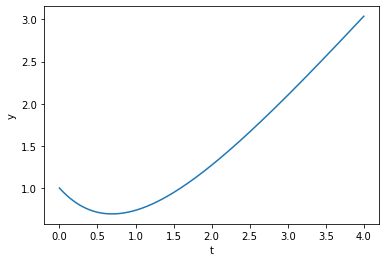

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dy_dt(t, y):
    return t - y

a = 0
b = 4
t = np.linspace(a,b,1000)
y0 = 1
y_int = solve_ivp(dy_dt, [a,b], [1], t_eval=t)

plt.xlabel("t")
plt.ylabel("y")
plt.plot(y_int.t, y_int.y[0])

plt.show()

Vi definerer her et sett med t-verdier slik at vi får et intervall å integrere over. Dernest er det viktig å ha en startbetingelse for $y$ (husk: vi trenger den forrige $y$-verdien for å finne den neste). Funksjonen _solve\_ivp_ er en generell løser for differensiallikninger og tar som første parameter en funksjon av typen $f(t,y)$ – legg merke til rekkefølgen på parameterne. Deretter legger vi inn tidsintervallet som vi skal integrere over. Dette legges inn som en liste.

Etter tidsintervallet legges startbetingelsene inn. Siden _solve\_ivp_ er en løser som kan løse systemer av differensiallikninger, må vi lage startbetingelsen som en liste. Deretter har vi en del valgfrie parametre. Vi har brukt parameteren _t\_eval_ her fordi den sier hvilke $t$-verdier vi skal regne ut $y$-verdier for. Hvis vi ikke gjør dette, får vi integralet kun evaluert i noen få punkter. Det kan være greit hvis vi for eksempel bare ønsker sluttverdien, men ikke hvis vi ønsker å plotte resultatene.

Dersom du prøver å printe ut resultatene fra _solve\_ivp_, får du mye ulik informasjon. Derfor henter vi ut spesifikke _t-_ og _y-_verdier ved  å skrive _y_int2.t_, som henter ut tidsverdiene, og _y_int2.y[0]_, som henter ut _y_-verdiene. Legg merke til at $y$ kan inneholde flere elementer ettersom vi kan løse systemer av differensiallikninger. Her må vi eksplisitt be om det første elementet (element 0 med Python-språk), selv om arrayen ikke inneholder flere $y$-verdier.

```{admonition} Underveisoppgave
:class: tip
Løs differensiallikningen $f'(t) = \cos(t)$ med $f(t_0) = 0$ med _solve\_ivp_ fra $t=0$ til $t=\pi$. Plott den analytiske løsningen $f(t) = \sin(t)$ i samme koordinatsystem for å sammenlikne.
```

Algoritmene som brukes i slike biblioteker, er ofte sammensatte algoritmer som benytter seg av flere prinsipper enn en enkelt metode. Som standard benytter _solve\_ivp_ seg av en blanding av Runge-Kutta 4 og Runge-Kutta 5, kalt RK45. Dette er gode "go to"-metoder.

## Oppgaver

```{admonition} Oppgave 1
:class: tip
Utled Eulers metode og skriv et program for hånd som implementerer denne metoden.
```

```{admonition} Oppgave 2
:class: tip
Løs differensiallikningene nedenfor med Eulers metode (og analytisk hvis du får til). Bruk initialbetingelse $f(0) = 0$, og velg løsningsområde/løsningsintervall selv.
1. $f'(x) = 1$
2. $f'(x) = x$
3. $f'(x) = 4 + 3\cdot f(x)$
4. $y' + 4y + 3x = 0$
5. $xy' + y = 3x^2 + 4x$
6. $f'(x) = x + y^2$
```

```{admonition} Oppgave 3
:class: tip
Hvorfor må vi ha initialbetingelser for å løse en differensiallikning numerisk?
```

````{admonition} Oppgave 4
:class: tip
Det er alltids fint å ha definert funksjoner i et program -- da kan du gjenbruke dem i andre programmer!
a. Skriv et program der Eulers metode er definert som en funksjon. Funksjonen skal ta inn som argument _yder_, som antas å være en funksjon av to variable $x$ og $y$. Funksjonen skal også ta inn en initialbetingelse _y0_, startverdien og sluttverdien til _x_ og steglengden _dt_. Funksjonene skal så returnere resultatene, altså lister eller arrayer med verdier av _y_ og _x_. __Tips:__ For at en funksjon skal returnere to verdier, kan du skrive _return x,y_.
	
b. Bruk funksjonen til å løse likninga $y'(x) = -\dfrac{xy}{x^2+1}$ der $y(0) = 1$ og $x \in [0,7]$.
__Tips:__ Funksjonen returnerer to verdier:_y_ og _x_. Du kan hente to eller flere verdier fra en funksjon, ved å gjøre slik:

```{code-block} Python
x, y = # Her kaller du på funksjonen din med riktige parametre
```
Da vil variabelen _x_ settes til å være lik den returnerte verdien for _x_, og variabelen _y_ settes til å være lik den returnerte verdien for _y_. 
	
c. Plott resultatet ditt sammen med den analytiske løsninga for å se om funksjonen din er implementert riktig:

$$y(x) = \frac{1}{\sqrt{x^2 + 1}}$$
````

````{admonition} Oppgave 5
:class: tip
Programmet under løser likninga $f'(x) = 2f(x)$ der $f(0) = 2$ for $x\in[0,1]$:

```{code-block} Python
import matplotlib.pyplot as plt
import numpy as np

N = 1000
a = 0
b = 1
x = np.linspace(a,b,N)
dx = x[1]-x[0]

fder = np.zeros(N)
f = np.zeros(N)

f[0] = 2
for i in range(N-1):
	fder[i] = 2*f[i]
	f[i+1] = f[i] + dx*fder[i]
plot(x,f)
xlabel("x")
ylabel("f(x)")
title("Plott av f(x)")
show()
```
````

```{admonition} Oppgave 6
:class: tip
Kari begynner med å ha en årsinntekt på $I(0) = 500 000$ kroner og har nylig oppretta en sparekonto. Hun har derfor $S(0) = 0$ kroner i sparekontoen.

Vi velger å prøve ut følgende modeller for forandringen i inntekten hennes $I'(t)$ og sparekontoen hennes $S'(t)$:

$$I'(t) = I(0) \cdot \ln(1.006)\cdot 1.006^t$$
$$S'(t) = 0.01\cdot I(t)$$

Lag et program som finner ut hvordan $S(t)$ vil utvikle seg i løpet av 15 år. Visualiser resultatet.
```

```{admonition} Oppgave 7
:class: tip
Lag et program som regner ut posisjon, hastighet og akselerasjon til et legeme som faller. Bruk luftmotstandskoeffisienten 0.1 og masse 1 kg.

a. Benytt først en enkel modell uten luftmotstand, det vil si kun fritt fall.

b. Legg inn luftmotstand og plott i samme koordinatsystem som beregninga uten luftmotstand. Sammenlikn resultatene og kommenter svaret.

c. Varier systematisk massen og luftmotstandskoeffisienten og se hva dette gjør med resultatene.
```

```{admonition} Oppgave 8
:class: tip
Lag et program som modellerer en fiskepopulasjon. Du kan selv bestemme modellen du bruker og initialbetingelsene. Forklar hvorfor du brukte akkurat denne modellen.
```

```{admonition} Oppgave 9
:class: tip
Newtons avkjølingslov forteller oss at temperaturen $T(t)$ etter ei tid $t$ til et objekt i en omgivelse forandrer seg på følgende måte:

$$T(t) = -k(T(t)  - T_o)$$

der $k$ er er en konstant som forteller hvor raskt temperaturen forandrer seg og $T_o$ representerer temperaturen til omgivelsen objektet befinner seg i. 

a. Et varmeanlegg i en bil påvirker innetemperaturen $T(t)$ i bilen. Temperaturen inni bilen kan uttrykkes ved:

$$T'(t) = -0.16(T(t)  - 20)$$

der $T(0) = 7^oC$. 
	
Lag et program som bruker Eulers metode til å finne funksjonsverdiene til $T(t)$ for $t \in [0, 30]$. Plott resultatene.
	
b. Som du kanskje så i deloppgave _a_, tar det fryktelig lang tid før temperaturen i bilen når vanlig romtemperatur som ligger på $20^oC$. Du finner derfor en som prøver å fikse på varmeanlegget billigst mulig. Uheldigvis greier personen å gjøre varmeanlegget verre. Etter noen målinger finner du at temperaturen forandrer seg på følgende måte:

$$T'(t) = -0.16(T(t) - T_o(t))$$

der $T_o(t) = 5\cdot\cos\left(\frac{\pi^2}{15}\cdot t\right) + 19$

Utvid programmet ditt slik at det plotter bilens temperatur med det (enda mer) ødelagte varmeanlegget. Sammenlikn utfallene.
```

```{admonition} Oppgave 10
:class: tip
Arne skal på familiemiddag og har lovet familien sin å ta med sin smakfulle tilberedelse av en kalkun. Fem timer før middagen kommer han plutselig på middagsavtalen. Uheldigvis bruker han vanligvis fire timer på å kjøre til familien hvis han kjører omtrent 80 km i timen.

Problemet er at kalkunen må være i en ovn på 180$^o$C i tre timer for å bli spiseklar. Han veit at under panseret på bilen kan det bli varmere enn dette. Han bestemmer seg derfor for å prøve å tilberede kalkunen under panseret mens han kjører.  

Arne har lagd følgende modell for temperaturen under panseret etter ei tid $t$:

$$T_o(t) = 35\log(v(t)+1)+0.4v(t)\sin(2\pi p\cdot t) + 37.7$$

der $v(t)$ er farten til bilen og $p$ er et tilfeldig flyttall mellom 1 og 2. Verdien til $p$ forandrer seg for hver tid $t$

Fra Newtons avkjølingslov vil temperaturen $T(t)$ til kalkunen forandre seg på følgende måte:

$$T'(t) = -4\cdot(T(t) - T_o(t))$$

Akselerasjonen $a(t)$ til bilen etter ei tid $t$ vil følge modellen

$$a(t) = 2000e^{-500t^2}$$

Lag et program som finner kalkunens temperatur etter fire timer under panseret. Plott temperaturen og forklar ut fra plottet om kalkunen vil være spiseklar eller ikke etter kjøreturen (I episoden _Food Fables_ fra Mythbusters kan du se at dette faktisk er mulig!).
```

## Videoer

<iframe width="850" height="450" src="https://www.youtube.com/embed/O08ToTAqp5w" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>